In [1]:
import pickle
import os
import numpy as np
import torch
import pandas as pd

# Load data

In [2]:
from plot_utils import *

In [3]:
params_list=[
({'xj':'1-3,2-3','en':2000,'anc':True},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(5),'L':np.array([8,10,12,14,16,18])}),
({'xj':'1-3,2-3','en':500,'anc':True},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(20),'L':np.array([20,])}),
({'xj':'1-3,2-3','en':100,'anc':True},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(100),'L':np.array([22,])}),
]

for fixed_params,vary_params in params_list:
    data_1_3_anc_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',
        fn_dir_template='Data/Metrics/{xj}{"_anc"*anc}/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj}){"_anc"*anc}.pickle', 
    )
df_1_3_anc=convert_pd(data_1_3_anc_dict,names=['Metrics','L','p_ctrl','p_proj'])

Loading data_dict Data/Metrics/1-3,2-3_anc/xj(1-3,2-3)_anc.pickle


generate_params: 100%|██████████| 111630/111630 [00:02<00:00, 39617.47it/s]


Loading data_dict Data/Metrics/1-3,2-3_anc/xj(1-3,2-3)_anc.pickle


generate_params: 100%|██████████| 74420/74420 [00:01<00:00, 39657.89it/s]


Loading data_dict Data/Metrics/1-3,2-3_anc/xj(1-3,2-3)_anc.pickle


generate_params: 100%|██████████| 372100/372100 [00:09<00:00, 39074.93it/s]


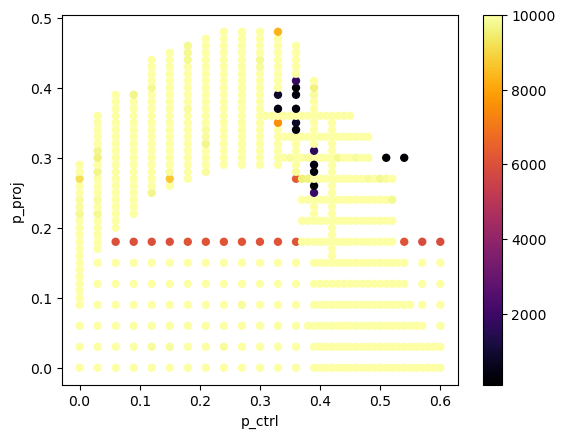

In [4]:
visualize_dataset(df_1_3_anc,params={'Metrics':'SA','L':22},xlabel='p_ctrl',ylabel='p_proj')

In [5]:
len(data_1_3_anc_dict['fn'])

92786

In [8]:
fns=set(os.listdir('Data/Metrics/1-3,2-3_anc'))

In [9]:
[fn for fn in fns-data_1_3_anc_dict['fn'] if 'L(10' not in fn]

['xj(1-3,2-3)_anc.pickle']

# Plot

## $S_{anc}$

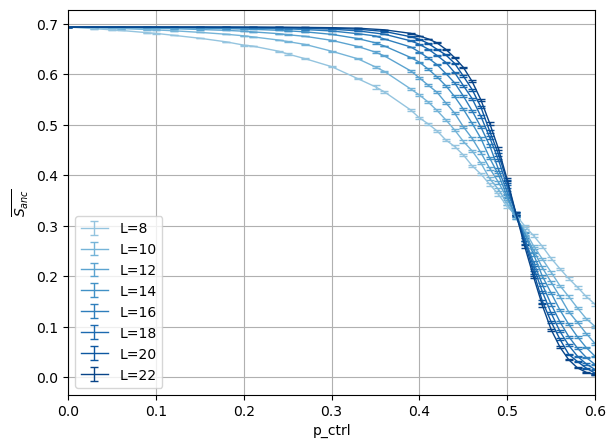

In [14]:
plot_line_inset(df=df_1_3_anc,
L_list=np.arange(8,24,2),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='SA',
x_name='p_ctrl',
fixed_params={'p_proj':0},
yscale=None,
errorbar=True,
filename=None,
)